In [39]:
import numpy as np
import pandas as pd
import rcf as rrcff 
import matplotlib.pyplot as plt
import pickle


num_trees = 100
tree_size = 256

# Construct forest


In [40]:
file = '/home/hv/brake_string/jupyterNotebook/cifar-10-batches-py/data_batch_2'
with open(file,'rb') as fo:
     dict= pickle.load(fo,encoding='bytes')
dict.keys()
labels=dict[b'labels']
X=np.array(dict[b'data'])
print(X.shape)
n=X.shape[0]
d=X.shape[1]
print("n is:",n)
print("d is:",d)
print(X)


(10000, 3072)
n is: 10000
d is: 3072
[[ 35  27  25 ... 169 168 168]
 [ 20  20  18 ... 111  97  51]
 [116 115 155 ...  18  84 124]
 ...
 [127 139 155 ... 197 192 191]
 [190 200 208 ... 163 182 192]
 [177 174 182 ... 119 127 136]]


In [38]:
forest = []
# Set forest parameters
while len(forest) < num_trees:
    #Select random subsets of points uniformly
    #np.random.shuffle(X)
    #print(X.shape)
    trees = rrcff.RCTree(X)
    #print("creatred tree:",trees)
    forest.append(trees)
avg_codisp = pd.Series(0.0, index=np.arange(n))
index = np.zeros(n)
for tree in forest: 
    codisp = pd.Series({leaf : tree.codisp(leaf)
                       for leaf in tree.leaves})
    avg_codisp[codisp.index] += codisp
    np.add.at(index, codisp.index.values, 1)
avg_codisp /= index

#print(forest)
#print("-------> ",avg_codisp[2080])
#if avg_codisp[2080]>30 :
   # break
plt.plot(avg_codisp.iloc[1:2184])
plt.hlines(25,1,2184,'r')
plt.grid()
plt.show()
print(avg_codisp.max())

TypeError: No loop matching the specified signature and casting
was found for ufunc true_divide

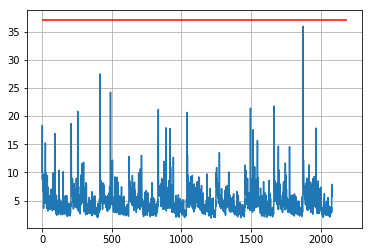

In [114]:

# Compute average CoDisp
avg_codisp = pd.Series(0.0, index=np.arange(n))
index = np.zeros(n)
for tree in forest:
    codisp = pd.Series({leaf : tree.codisp(leaf)
                       for leaf in tree.leaves})
    avg_codisp[codisp.index] += codisp
    np.add.at(index, codisp.index.values, 1)
avg_codisp /= index
plt.plot(avg_codisp.iloc[1:2184])
plt.hlines(37,1,2184,'r')
plt.grid()
plt.show()
#avg_codisp.where(avg_codisp>37).min()

In [20]:
new_testpoint=X[2084]
coD=[]
for tree in forest:
     tree.insert_point(new_testpoint,index=123)
#print(coD.sum()/num_tree)
      

AssertionError: 

Dist is: 5.550624999999999
Cnt is: 25
25


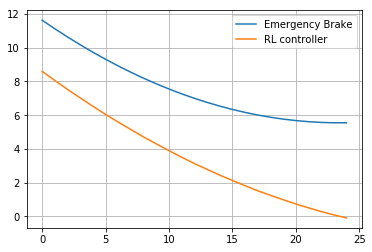

In [95]:
acc=-8.82  #m/s^2
vel=10.8    #m/s
dist=12.16  #m
velocity=[]
distance=[]
cnt=0
while(vel>0.05):
    dist=dist-(vel*0.05+0.5*acc*(0.05)*0.05)
    vel=vel+acc*0.05
    cnt+=1
    distance.append(dist)
    velocity.append(vel)
print("Dist is:",dist)
print("Cnt is:",cnt)

plt.plot(distance,label="Emergency Brake")

real_dist=X[2158:2184][:,0]
plt.plot(real_dist,label="RL controller")
print(len(real_dist))
plt.grid()
plt.legend(loc="upper right")
plt.show()

In [96]:
X[2158:2184][:,1]

array([8.95, 8.64, 8.33, 8.02, 7.71, 7.4 , 7.09, 6.79, 6.48, 6.17, 5.86,
       5.55, 5.24, 4.93, 4.62, 4.32, 4.01, 3.7 , 3.39, 3.08, 2.77, 2.46,
       2.15, 1.85, 1.54])

37.83333333333333


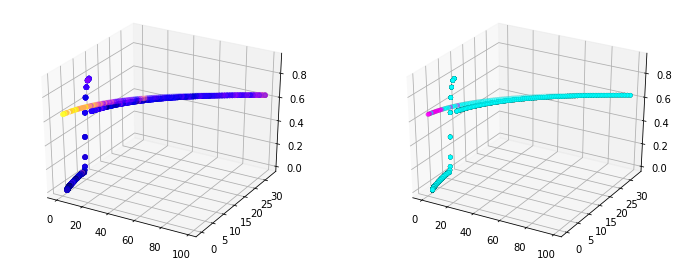

In [5]:
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
from matplotlib import colors

threshold = avg_codisp.nlargest(n=10).min()
print(threshold)
fig = plt.figure(figsize=(12,4.5))
ax = fig.add_subplot(121, projection='3d')
sc = ax.scatter(X[:,0], X[:,1], X[:,2],
                c=np.log(avg_codisp.sort_index().values),
                cmap='gnuplot2')
#plt.title('log(CoDisp)')
ax = fig.add_subplot(122, projection='3d')
sc = ax.scatter(X[:,0], X[:,1], X[:,2],
                linewidths=0.1, edgecolors='k',
                c=(avg_codisp >= 35).astype(float),
                cmap='cool')
#plt.title('CoDisp above 99.5th percentile')


In [27]:
tree1 = rrcf.RCTree()

for i in range(6):
    x = np.random.randn(2)
    tree1.insert_point(x, index=i)


In [28]:
#tree1 = rrcf.RCTree()
x1 = np.random.randn(2)
print(x1)
tree1.insert_point(x1, index=i)   

[1.972233   1.18621487]


AssertionError: 